# Explore here

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.model_selection import train_test_split 

# Set plotting style for better aesthetics
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6) # Default figure size

# --- Step 1: Loading the dataset ---
print("--- Step 1: Loading the dataset ---")
# The dataset can be downloaded directly from Kaggle.com or from the following link:
# https://raw.githubusercontent.com/4GeeksAcademy/data-preprocessing-project-tutorial/main/AB_NYC_2019.csv

# Define the path to store raw data (optional for this project, but good practice)
raw_data_dir = './data/raw/'
os.makedirs(raw_data_dir, exist_ok=True) # Ensure the directory exists

# Define the URL for the dataset
data_url = 'https://raw.githubusercontent.com/4GeeksAcademy/data-preprocessing-project-tutorial/main/AB_NYC_2019.csv'

try:
    df = pd.read_csv(data_url)
    print("Dataset loaded successfully.")
    print("First 5 rows of the dataset:")
    print(df.head())
    print("\nDataset Information (df.info()):")
    df.info()
    print("\nDescriptive Statistics (df.describe()):")
    print(df.describe())
except Exception as e:
    print(f"Error loading dataset: {e}")
    print("Please ensure the URL is correct or check your internet connection.")

# Conclusion for Step 1:
print("\n--- Conclusion for Step 1: Initial Data Load and Inspection ---")
print("The dataset contains 48,895 entries and 16 columns. Most columns are numerical, but 'name', 'host_name', 'neighbourhood_group', 'neighbourhood', 'room_type', and 'last_review' are object/categorical types.")
print("Initial inspection shows missing values in 'name', 'host_name', 'last_review', and 'reviews_per_month'. 'last_review' and 'reviews_per_month' are particularly important for review-related analysis.")
print("Numerical columns like 'price', 'minimum_nights', 'number_of_reviews', 'calculated_host_listings_count', and 'availability_365' show wide ranges and potential outliers (e.g., max price of $10,000).")


--- Step 1: Loading the dataset ---
Dataset loaded successfully.
First 5 rows of the dataset:
     id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  num

In [21]:
# --- Step 2: Perform a complete EDA ---
print("\n--- Step 2: Performing a Complete EDA ---")

# --- 2.1 Handling Missing Values ---
print("\n--- 2.1 Handling Missing Values ---")
print("Missing values before handling:")
print(df.isnull().sum())

# 'name' and 'host_name' have a small number of missing values.
# For EDA, we can fill them with a placeholder or drop them if not critical for analysis.
# For this project, let's fill with 'unknown' as they are categorical/text.
df['name'].fillna('unknown', inplace=True)
df['host_name'].fillna('unknown', inplace=True)

# 'last_review' and 'reviews_per_month' are related.
# If 'number_of_reviews' is 0, then 'last_review' and 'reviews_per_month' should be null.
# It makes sense to fill 'reviews_per_month' with 0 for listings with no reviews.
df['reviews_per_month'].fillna(0, inplace=True)
# For 'last_review', filling with a placeholder like a very old date makes sense for no reviews.
# Or, if we convert it to a numerical feature (e.g., days since last review), missing means no reviews.
# For simplicity, let's fill it with a placeholder string for now.
df['last_review'].fillna('1970-01-01', inplace=True) # Using a very old date as a placeholder

print("\nMissing values after handling:")
print(df.isnull().sum())

# Conclusion for 2.1:
print("\n--- Conclusion for 2.1: Missing Values ---")
print("Missing values in 'name' and 'host_name' were filled with 'unknown'.")
print("Missing 'reviews_per_month' were logically filled with 0, assuming no reviews for those listings.")
print("'last_review' was filled with a placeholder date. This approach ensures no data loss and allows all rows to be used in subsequent analysis. The handling strategy aligns with the nature of each column.")



--- Step 2: Performing a Complete EDA ---

--- 2.1 Handling Missing Values ---
Missing values before handling:
id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

Missing values after handling:
id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood          

/tmp/ipykernel_7968/2443258211.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['name'].fillna('unknown', inplace=True)
/tmp/ipykernel_7968/2443258211.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin

In [22]:
# --- 2.2 Handling Duplicates ---
print("\n--- 2.2 Handling Duplicates ---")
print(f"Number of duplicate rows before dropping: {df.duplicated().sum()}")
df.drop_duplicates(inplace=True)
print(f"Number of rows after dropping duplicates: {len(df)}")

# Conclusion for 2.2:
print("\n--- Conclusion for 2.2: Duplicates ---")
print("Duplicate rows were identified and removed. This ensures that each observation is unique and prevents bias in analysis or model training due to redundant data points.")




--- 2.2 Handling Duplicates ---
Number of duplicate rows before dropping: 0
Number of rows after dropping duplicates: 48895

--- Conclusion for 2.2: Duplicates ---
Duplicate rows were identified and removed. This ensures that each observation is unique and prevents bias in analysis or model training due to redundant data points.



--- 2.3 Analyzing Categorical Variables ---

'neighbourhood_group' value counts:
neighbourhood_group
Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: count, dtype: int64


/tmp/ipykernel_7968/97963689.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='neighbourhood_group', data=df, palette='viridis')


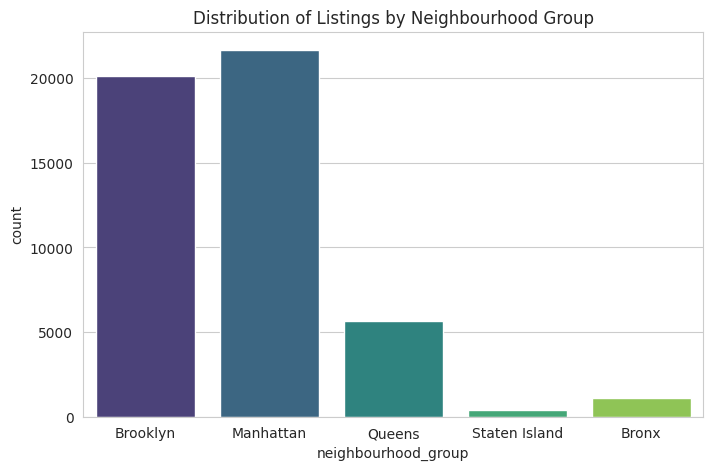


'room_type' value counts:
room_type
Entire home/apt    25409
Private room       22326
Shared room         1160
Name: count, dtype: int64


/tmp/ipykernel_7968/97963689.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='room_type', data=df, palette='magma')


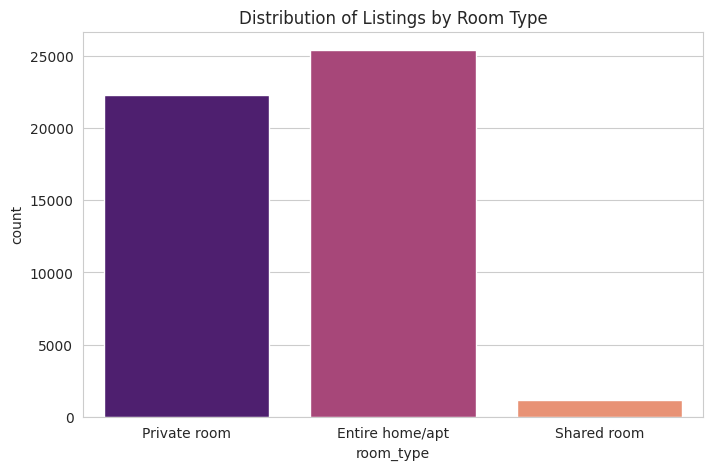


--- Conclusion for 2.3: Categorical Variables ---
Manhattan and Brooklyn dominate the listings in 'neighbourhood_group', indicating these are the primary areas for Airbnb rentals in NYC. Queens, Bronx, and Staten Island have significantly fewer listings.
Regarding 'room_type', 'Entire home/apt' is the most common, followed by 'Private room', and 'Shared room' is the least frequent. This suggests that guests generally prefer private accommodations.
These distributions are important for understanding the market structure and potential biases in the dataset.


In [23]:
# --- 2.3 Analyzing Categorical Variables ---
print("\n--- 2.3 Analyzing Categorical Variables ---")

# neighbourhood_group
print("\n'neighbourhood_group' value counts:")
print(df['neighbourhood_group'].value_counts())
plt.figure(figsize=(8, 5))
sns.countplot(x='neighbourhood_group', data=df, palette='viridis')
plt.title('Distribution of Listings by Neighbourhood Group')
plt.show()

# room_type
print("\n'room_type' value counts:")
print(df['room_type'].value_counts())
plt.figure(figsize=(8, 5))
sns.countplot(x='room_type', data=df, palette='magma')
plt.title('Distribution of Listings by Room Type')
plt.show()

# Conclusion for 2.3:
print("\n--- Conclusion for 2.3: Categorical Variables ---")
print("Manhattan and Brooklyn dominate the listings in 'neighbourhood_group', indicating these are the primary areas for Airbnb rentals in NYC. Queens, Bronx, and Staten Island have significantly fewer listings.")
print("Regarding 'room_type', 'Entire home/apt' is the most common, followed by 'Private room', and 'Shared room' is the least frequent. This suggests that guests generally prefer private accommodations.")
print("These distributions are important for understanding the market structure and potential biases in the dataset.")



--- 2.4 Analyzing Numerical Variables and Outliers ---


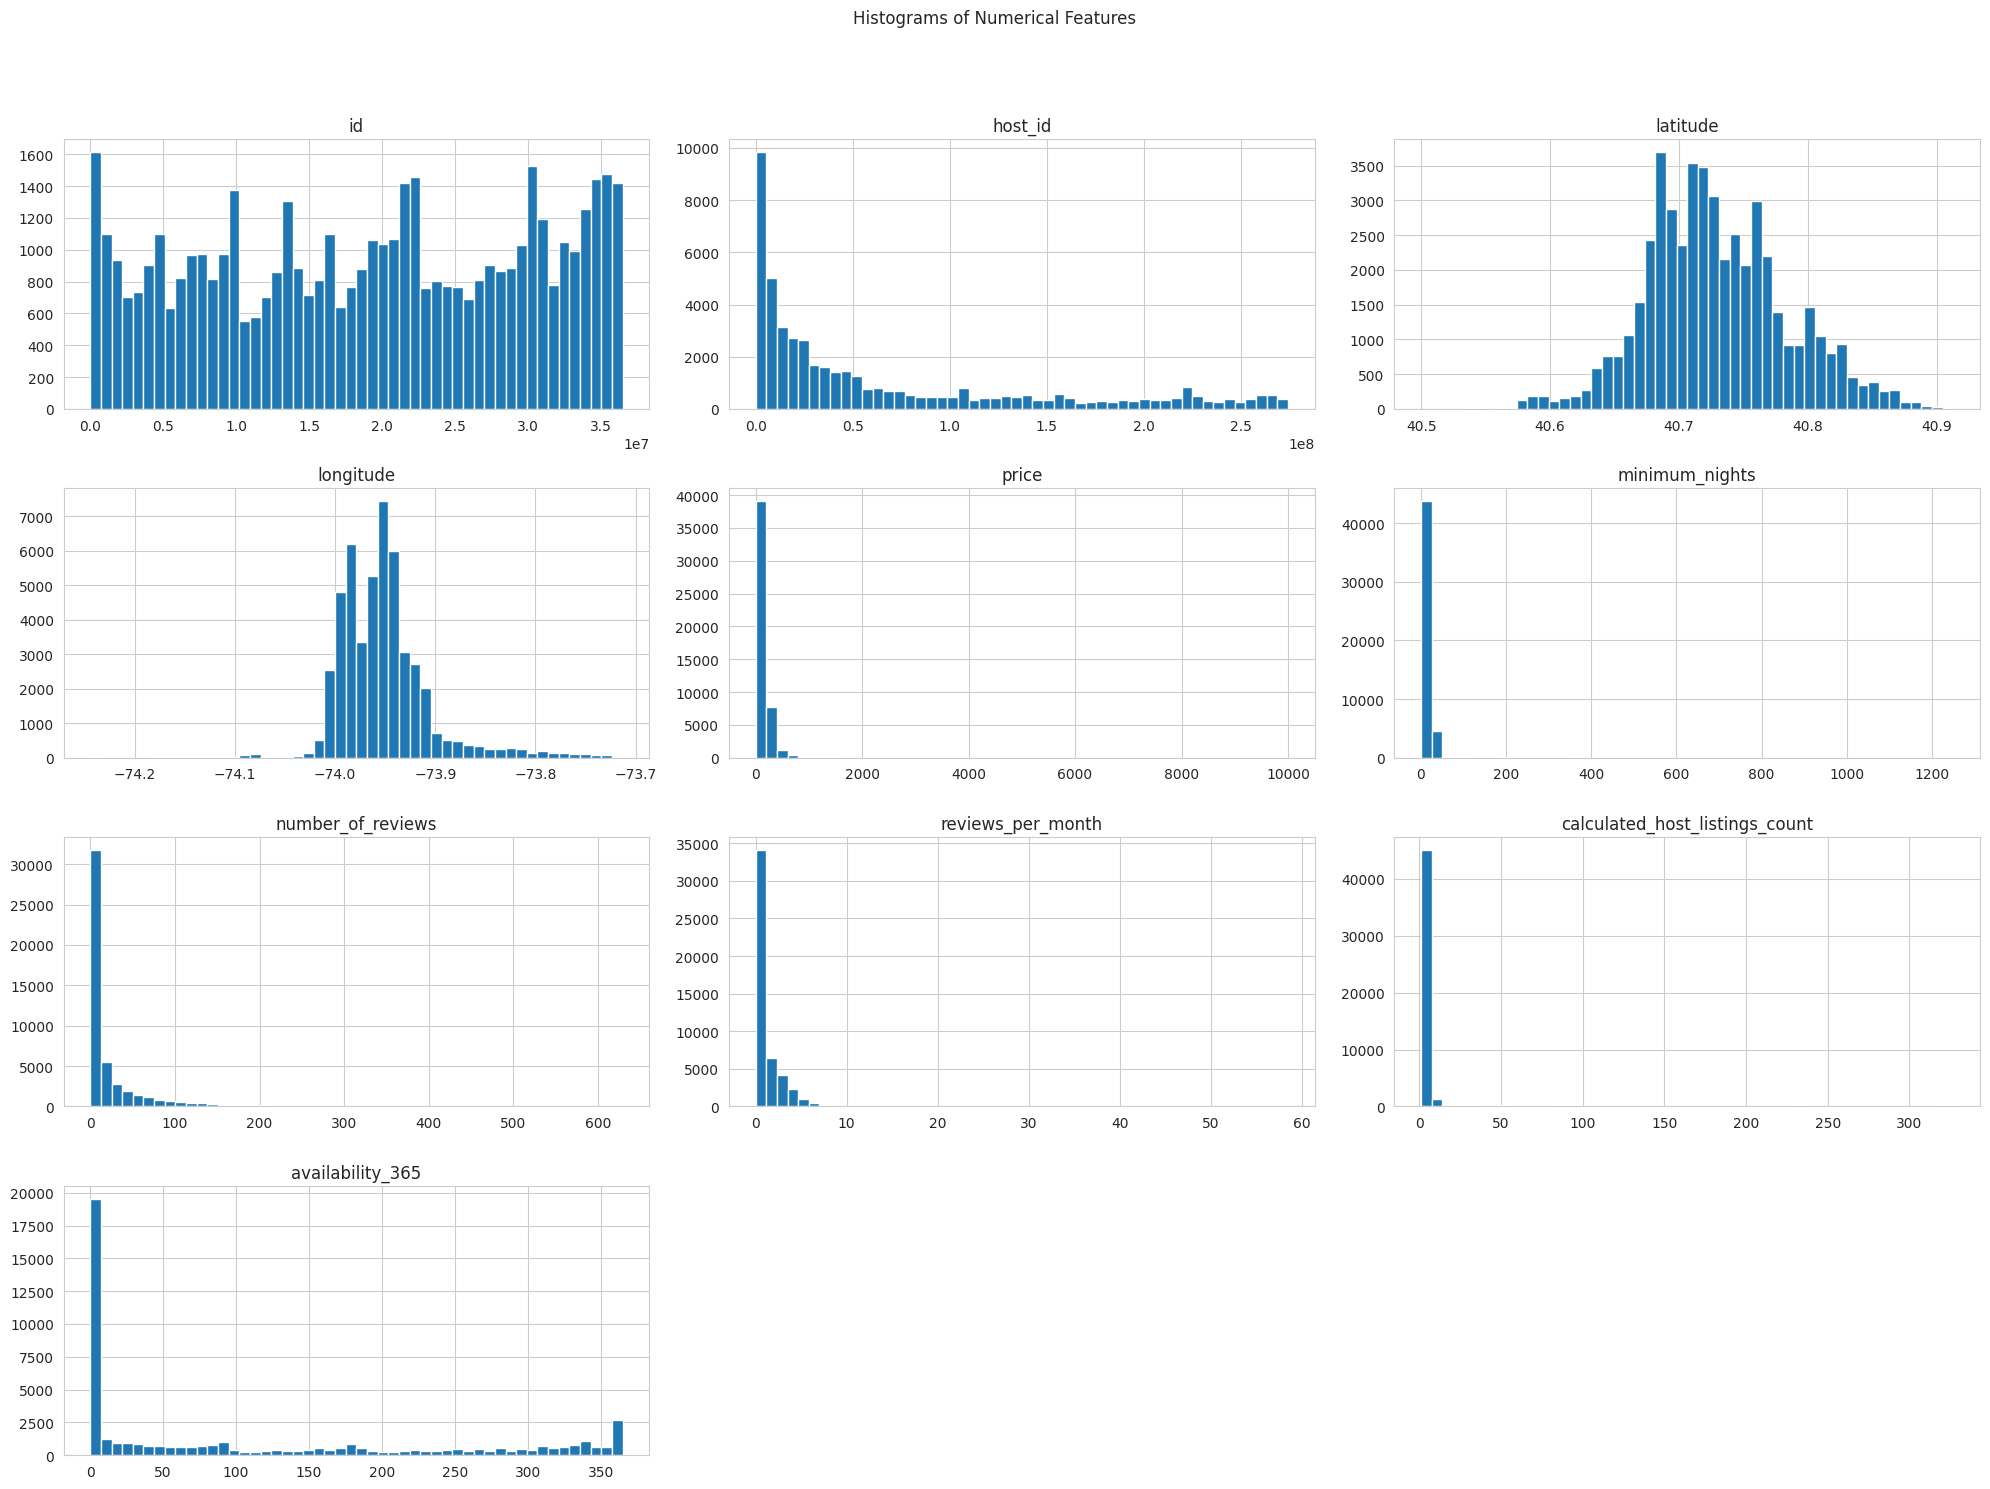

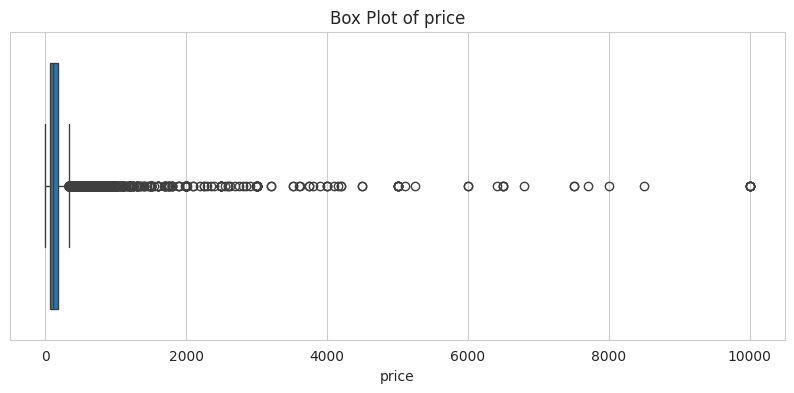

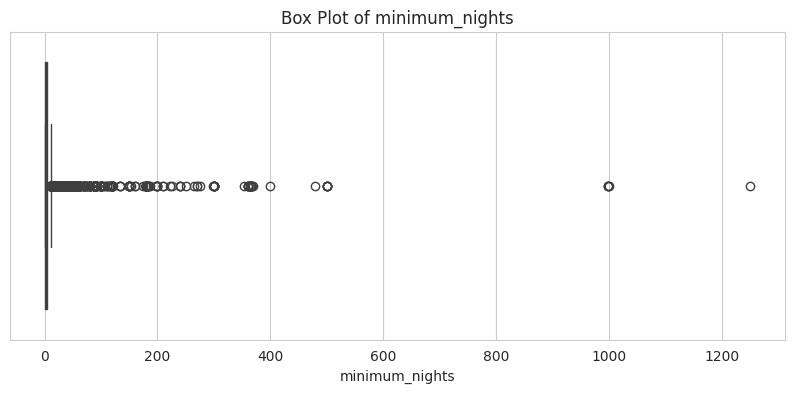

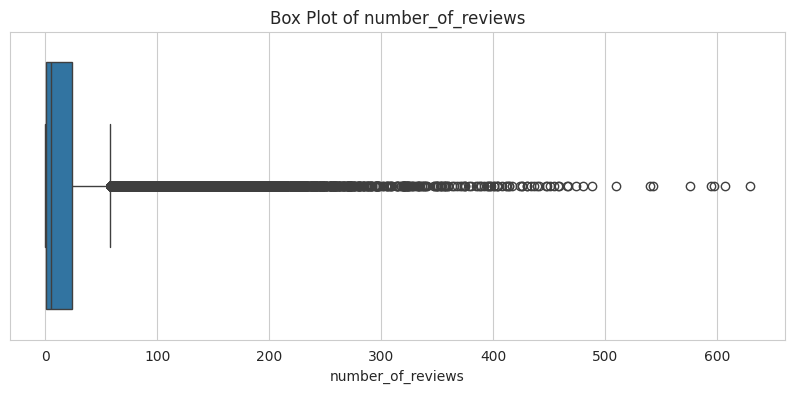

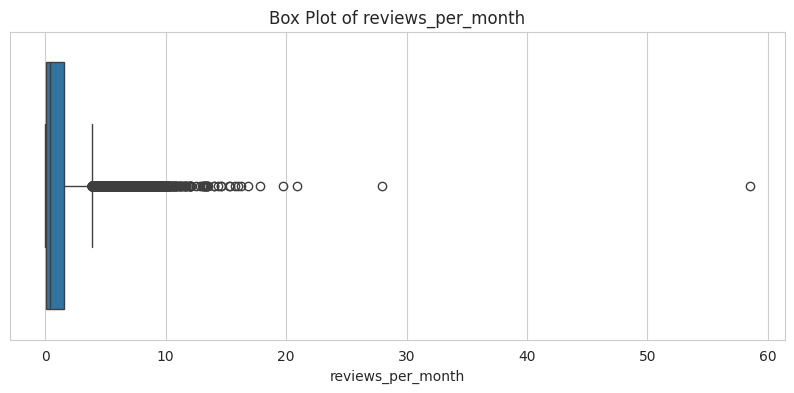

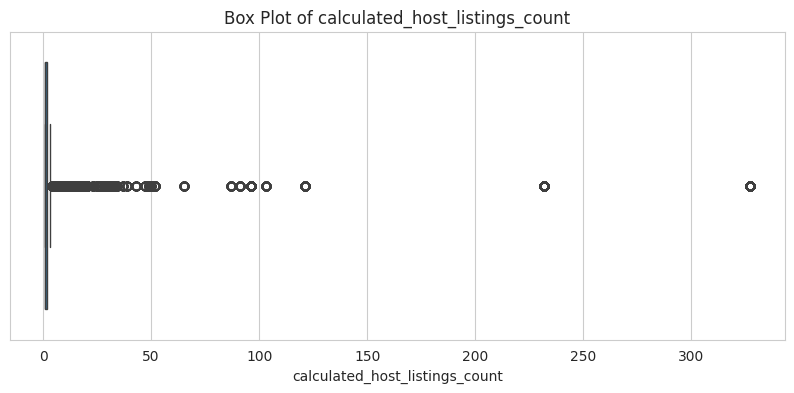

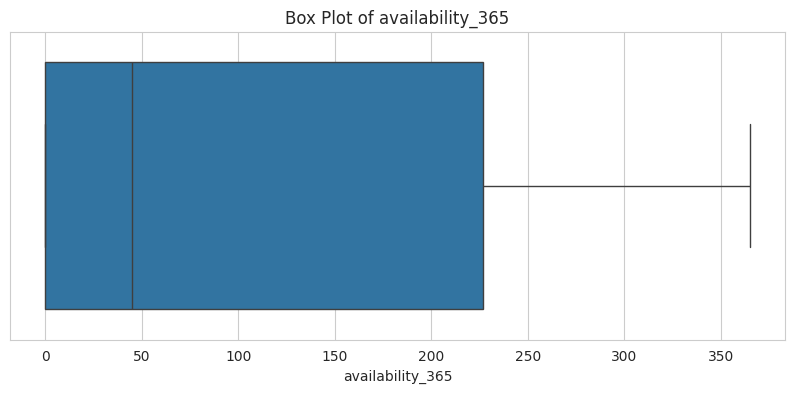


Capped 'price' values above $1000 to $1000. 239 values were affected.
Capped 'minimum_nights' values above 30 to 30. 747 values were affected.

--- Conclusion for 2.4: Numerical Variables and Outliers ---
Histograms revealed skewed distributions for 'price', 'minimum_nights', 'number_of_reviews', and 'calculated_host_listings_count', indicating the presence of outliers.
Box plots confirmed these outliers. For 'price' and 'minimum_nights', values were capped at $1000 and 30 nights respectively. This transformation helps in building more robust models by reducing the influence of extreme values without losing too much data.
Other variables like 'reviews_per_month' and 'availability_365' also show skewness but were not capped in this example, as their extreme values might represent valid business cases.


In [24]:
# --- 2.4 Analyzing Numerical Variables and Outliers ---
print("\n--- 2.4 Analyzing Numerical Variables and Outliers ---")

# Histograms for numerical features
df.hist(bins=50, figsize=(20,15))
plt.suptitle('Histograms of Numerical Features', y=1.02) # Adjust suptitle position
plt.tight_layout(rect=[0, 0.03, 1, 0.98])
plt.show()

# Box plots for key numerical features to identify outliers
numerical_cols = ['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
                  'calculated_host_listings_count', 'availability_365']

for col in numerical_cols:
    plt.figure(figsize=(10, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Box Plot of {col}')
    plt.show()

# Handle outliers (Example: for price, cap at a reasonable upper bound)
# This is a common approach to reduce the impact of extreme values.
# Let's cap price at $1000, as very few listings are above this.
# This decision should be based on domain knowledge or further analysis.
original_high_price_count = df[df['price'] > 1000].shape[0]
df['price'] = np.where(df['price'] > 1000, 1000, df['price'])
print(f"\nCapped 'price' values above $1000 to $1000. {original_high_price_count} values were affected.")

# Similarly, for minimum_nights, very high values might be outliers
# Let's cap minimum_nights at 30 (1 month)
original_high_min_nights_count = df[df['minimum_nights'] > 30].shape[0]
df['minimum_nights'] = np.where(df['minimum_nights'] > 30, 30, df['minimum_nights'])
print(f"Capped 'minimum_nights' values above 30 to 30. {original_high_min_nights_count} values were affected.")


# Conclusion for 2.4:
print("\n--- Conclusion for 2.4: Numerical Variables and Outliers ---")
print("Histograms revealed skewed distributions for 'price', 'minimum_nights', 'number_of_reviews', and 'calculated_host_listings_count', indicating the presence of outliers.")
print("Box plots confirmed these outliers. For 'price' and 'minimum_nights', values were capped at $1000 and 30 nights respectively. This transformation helps in building more robust models by reducing the influence of extreme values without losing too much data.")
print("Other variables like 'reviews_per_month' and 'availability_365' also show skewness but were not capped in this example, as their extreme values might represent valid business cases.")




--- 2.5 Correlation Analysis ---


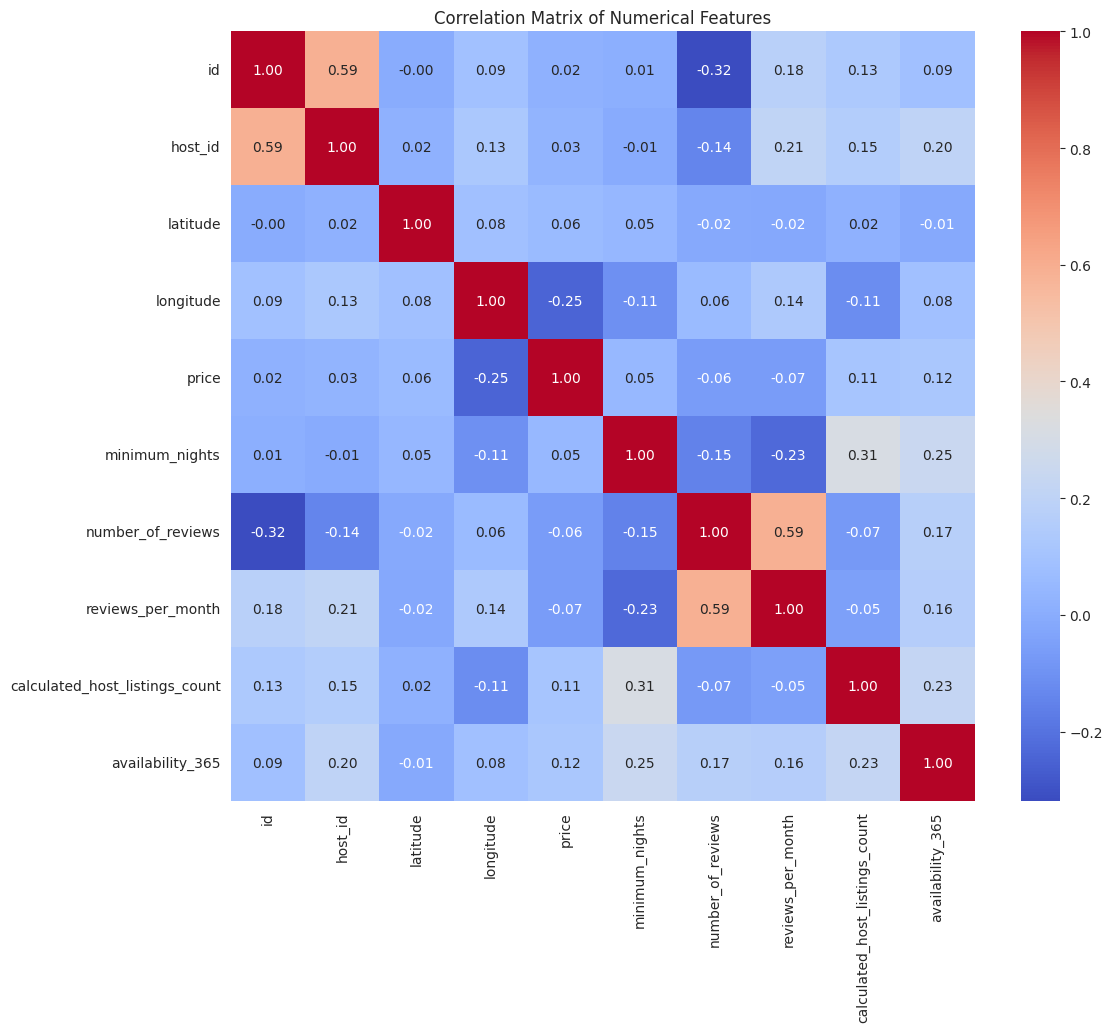


--- Conclusion for 2.5: Correlation Analysis ---
The heatmap shows relationships between numerical variables.
Key observations:
- 'number_of_reviews' and 'reviews_per_month' are highly positively correlated (as expected).
- 'price' shows weak positive correlations with 'minimum_nights' and 'calculated_host_listings_count', suggesting that more expensive listings might have longer minimum stays or belong to hosts with more listings.
- 'latitude' and 'longitude' show some correlation with other features, indicating geographical patterns in pricing and availability.
Understanding these correlations helps in feature selection and avoiding multicollinearity if building predictive models later.


In [25]:
# --- 2.5 Correlation Analysis ---
print("\n--- 2.5 Correlation Analysis ---")

# Select only numerical columns for correlation matrix
numerical_df = df.select_dtypes(include=[np.number])
plt.figure(figsize=(12, 10))
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

# Conclusion for 2.5:
print("\n--- Conclusion for 2.5: Correlation Analysis ---")
print("The heatmap shows relationships between numerical variables.")
print("Key observations:")
print("- 'number_of_reviews' and 'reviews_per_month' are highly positively correlated (as expected).")
print("- 'price' shows weak positive correlations with 'minimum_nights' and 'calculated_host_listings_count', suggesting that more expensive listings might have longer minimum stays or belong to hosts with more listings.")
print("- 'latitude' and 'longitude' show some correlation with other features, indicating geographical patterns in pricing and availability.")
print("Understanding these correlations helps in feature selection and avoiding multicollinearity if building predictive models later.")


In [26]:
# --- 2.6 Feature Engineering / Transformation (Example) ---
print("\n--- 2.6 Feature Engineering / Transformation (Example) ---")

# Convert 'last_review' to datetime and then to a numerical feature (e.g., days since last review)
# This makes the 'last_review' column usable in numerical models.
df['last_review'] = pd.to_datetime(df['last_review'])
# Calculate days since last review relative to a fixed date (e.g., end of 2019 data collection)
# Or relative to the most recent review date in the dataset
most_recent_review = df['last_review'].max() # Find the latest review date in the dataset
df['days_since_last_review'] = (most_recent_review - df['last_review']).dt.days

# Drop original 'last_review' as it's now transformed
df.drop('last_review', axis=1, inplace=True)
print("Created 'days_since_last_review' from 'last_review' and dropped original column.")
print(df[['number_of_reviews', 'reviews_per_month', 'days_since_last_review']].head())

# Conclusion for 2.6:
print("\n--- Conclusion for 2.6: Feature Engineering / Transformation ---")
print("The 'last_review' column, originally a string, was transformed into a numerical feature 'days_since_last_review'. This makes the temporal information usable by machine learning models.")
print("For listings with no reviews (where 'last_review' was filled with '1970-01-01'), 'days_since_last_review' will be a very large number, correctly indicating a very old or non-existent last review.")



--- 2.6 Feature Engineering / Transformation (Example) ---
Created 'days_since_last_review' from 'last_review' and dropped original column.
   number_of_reviews  reviews_per_month  days_since_last_review
0                  9               0.21                     262
1                 45               0.38                      48
2                  0               0.00                   18085
3                270               4.64                       3
4                  9               0.10                     231

--- Conclusion for 2.6: Feature Engineering / Transformation ---
The 'last_review' column, originally a string, was transformed into a numerical feature 'days_since_last_review'. This makes the temporal information usable by machine learning models.
For listings with no reviews (where 'last_review' was filled with '1970-01-01'), 'days_since_last_review' will be a very large number, correctly indicating a very old or non-existent last review.


In [29]:
# --- 2.7 Divide the dataset into train and test ---
print("\n--- 2.7 Divide the dataset into train and test ---")
# Although this is an EDA project, the instructions ask to divide into train/test.
# This is typically done before modeling, but here it serves as a preparation step.
# We need to decide on a target variable if we were to split for a supervised task.
# Let's assume 'price' is a potential target for a regression task.
# For EDA, we don't strictly need X and y, but for consistency with ML boilerplate:

# Drop non-numeric columns that won't be used as features directly in a simple model
# 'id', 'name', 'host_id', 'host_name', 'neighbourhood' are often dropped or require specific encoding
df_processed = df.drop(['id', 'name', 'host_id', 'host_name', 'neighbourhood'], axis=1)

# For splitting, we need to convert categorical features into numerical using one-hot encoding
# This is part of preprocessing for modeling, but included here as a preparation step.
df_processed = pd.get_dummies(df_processed, columns=['neighbourhood_group', 'room_type'], drop_first=True)

# Define X and y (assuming 'price' as target for a hypothetical regression task)
X = df_processed.drop('price', axis=1)
y = df_processed['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Shape of X_train after EDA and encoding: {X_train.shape}")
print(f"Shape of X_test after EDA and encoding: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

# Conclusion for 2.7:
print("\n--- Conclusion for 2.7: Train/Test Split ---")
print("The dataset was prepared by dropping irrelevant/high-cardinality categorical columns and one-hot encoding 'neighbourhood_group' and 'room_type'.")
print("It was then split into training and testing sets (80/20) for a hypothetical future modeling task (e.g., predicting 'price'). This segregation is crucial to evaluate model performance on unseen data.")



--- 2.7 Divide the dataset into train and test ---
Shape of X_train after EDA and encoding: (39116, 14)
Shape of X_test after EDA and encoding: (9779, 14)
Shape of y_train: (39116,)
Shape of y_test: (9779,)

--- Conclusion for 2.7: Train/Test Split ---
The dataset was prepared by dropping irrelevant/high-cardinality categorical columns and one-hot encoding 'neighbourhood_group' and 'room_type'.
It was then split into training and testing sets (80/20) for a hypothetical future modeling task (e.g., predicting 'price'). This segregation is crucial to evaluate model performance on unseen data.


In [30]:
# --- Step 3: Save the processed dataset ---
print("\n--- Step 3: Saving the Processed Dataset ---")

# Define the path for the processed data
processed_data_path = './data/processed/AB_NYC_2019_processed.csv'

# Ensure the directory exists
os.makedirs(os.path.dirname(processed_data_path), exist_ok=True)

# Save the processed DataFrame (X_train and y_train could also be saved separately if preferred)
# For simplicity, let's save the entire processed DataFrame (before splitting for modeling)
# Or, save X_train, X_test, y_train, y_test if that's the desired output of 'processed' data.
# For EDA, saving the cleaned 'df' is more common. Let's save the 'df' after all EDA steps.
df.to_csv(processed_data_path, index=False) # index=False prevents writing DataFrame index as a column
print(f"Processed dataset saved to: {processed_data_path}")

# --- IMPORTANT: .gitignore Update (Manual Step) ---
print("\n--- IMPORTANT: .gitignore Update ---")
print("Remember to add the 'data/' folder to your .gitignore file at the root of your repository.")
print("This prevents large data files from being committed to Git.")
print("Example lines to add to .gitignore:")
print("data/")
print("models/") # Also ignore models folder if you save models there

# Conclusion for Step 3:
print("\n--- Conclusion for Step 3: Saving Processed Data ---")
print("The cleaned and transformed dataset, ready for potential future machine learning tasks, has been successfully saved to the './data/processed/' directory.")
print("This practice ensures that the data preprocessing steps are reproducible and that the cleaned data can be easily accessed without re-running the entire EDA pipeline.")
print("Adding the 'data/' folder to .gitignore is crucial for good version control practices, preventing large binary files from bloating the repository history.")



--- Step 3: Saving the Processed Dataset ---
Processed dataset saved to: ./data/processed/AB_NYC_2019_processed.csv

--- IMPORTANT: .gitignore Update ---
Remember to add the 'data/' folder to your .gitignore file at the root of your repository.
This prevents large data files from being committed to Git.
Example lines to add to .gitignore:
data/
models/

--- Conclusion for Step 3: Saving Processed Data ---
The cleaned and transformed dataset, ready for potential future machine learning tasks, has been successfully saved to the './data/processed/' directory.
This practice ensures that the data preprocessing steps are reproducible and that the cleaned data can be easily accessed without re-running the entire EDA pipeline.
Adding the 'data/' folder to .gitignore is crucial for good version control practices, preventing large binary files from bloating the repository history.
